In [1]:
import pyautogui as pya
import numpy as np
import cv2
from matplotlib import pyplot as plt
import webbrowser
import time
import pandas as pd
import skimage
import scipy
#use adblockers on browser

# STEP 1 : Get all the URLs to scrap

In [2]:
D_URL={}
D_URL[0]={"URL":"https://www.cellartracker.com/wine.asp?iWine=940"}
D_URL[1]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2383250"}
D_URL[2]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2885171"}
D_URL[3]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2072263"}#
D_URL[4]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2535675"}
D_URL[5]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1903563"}
D_URL[6]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1591674"}
D_URL[7]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2914131"}
D_URL[8]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2951686"}
D_URL[9]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1318271"}
D_URL[10]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2653916"}
D_URL[11]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1195931"}
D_URL[12]={"URL":"https://www.cellartracker.com/wine.asp?iWine=224338"}
D_URL[13]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1128955"}
D_URL[14]={"URL":"https://www.cellartracker.com/wine.asp?iWine=922657"}
D_URL[15]={"URL":"https://www.cellartracker.com/wine.asp?iWine=719747"}
D_URL[16]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2374019"}
D_URL[17]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1546335"}
D_URL[18]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1077567"}
D_URL[19]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1603795"}
D_URL[20]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1122605"}
df=pd.DataFrame(D_URL).T
print(df)

                                                  URL
0    https://www.cellartracker.com/wine.asp?iWine=940
1   https://www.cellartracker.com/wine.asp?iWine=2...
2   https://www.cellartracker.com/wine.asp?iWine=2...
3   https://www.cellartracker.com/wine.asp?iWine=2...
4   https://www.cellartracker.com/wine.asp?iWine=2...
5   https://www.cellartracker.com/wine.asp?iWine=1...
6   https://www.cellartracker.com/wine.asp?iWine=1...
7   https://www.cellartracker.com/wine.asp?iWine=2...
8   https://www.cellartracker.com/wine.asp?iWine=2...
9   https://www.cellartracker.com/wine.asp?iWine=1...
10  https://www.cellartracker.com/wine.asp?iWine=2...
11  https://www.cellartracker.com/wine.asp?iWine=1...
12  https://www.cellartracker.com/wine.asp?iWine=2...
13  https://www.cellartracker.com/wine.asp?iWine=1...
14  https://www.cellartracker.com/wine.asp?iWine=9...
15  https://www.cellartracker.com/wine.asp?iWine=7...
16  https://www.cellartracker.com/wine.asp?iWine=2...
17  https://www.cellartracke

# STEP 2 : Scrap a given URL

In [88]:
d={}
TO_SCROLL=200
TIME_PAUSE=2
TIME_TO_MOVE=0.7
HIGH_CROP=120
DOWN_CROP=60
SIZE_KERNEL=6#default=4 #6
ITER_KERNEL=4 #defaut= 2
SIZE_MIN=100 #500

## STEP 2.1 Screenshot

In [79]:
#example for a given url
#URL="https://www.cellartracker.com/wine.asp?iWine=940"
#URL = "https://www.wine-searcher.com/find/haut+bailly+pessac+leognan+bordeaux+france/2015/france?Xprice=165.50&Xhide_nearest=N"
#URL="https://www.wine-searcher.com/find/e+guigal+cuvee+lieu+dits+st+joseph+rhone+france/2009/france?Xprice=18.00&Xhide_nearest=N"
#URL="https://www.wine-searcher.com/find/louis+jadot+dom+duc+de+magenta+morgeot+clos+la+chapelle+monopole+chass+montrachet+premier+cru+cote/2014/france?Xprice=28.00&Xhide_nearest=N"
#URL="https://www.cellartracker.com/wine.asp?iWine=2383250"
URL="https://www.cellartracker.com/wine.asp?iWine=922657"
UNIQUE_ID=1
PICTURE=str(UNIQUE_ID)+".png"
HTML=str(UNIQUE_ID)+".html"
d[UNIQUE_ID]={"URL":URL,"PICTURE":PICTURE,"HTML":HTML}
screenWidth, screenHeight = pya.size()
currentMouseX, currentMouseY = pya.position()
pya.moveTo(0, screenHeight / 2)
webbrowser.open(URL)
time.sleep(TIME_PAUSE)
pya.scroll(-TO_SCROLL)
time.sleep(.5)
im2=pya.screenshot()

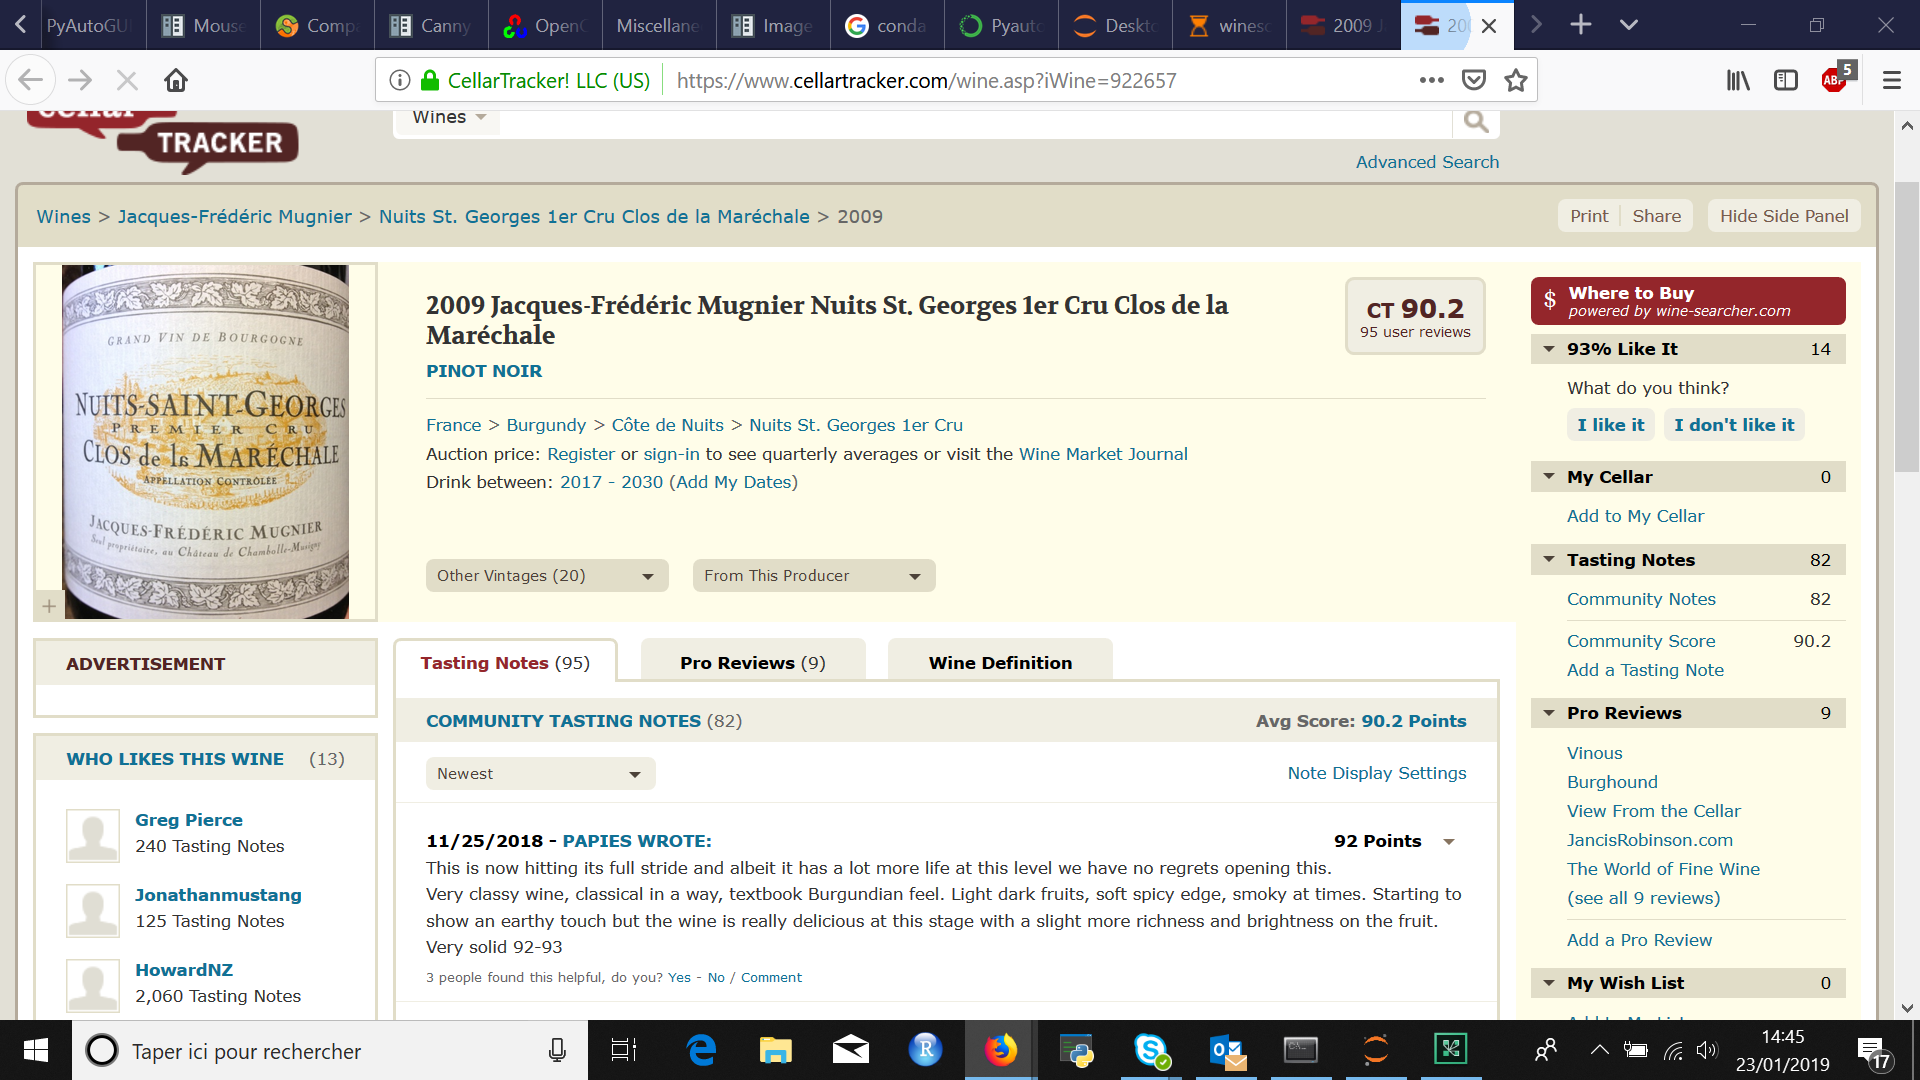

In [80]:
im2

## STEP 2.2 Image preprocessing

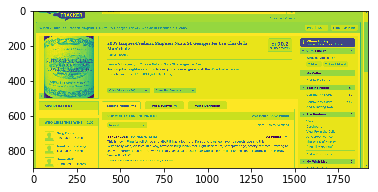

In [81]:
im=im2.crop((0,HIGH_CROP,screenWidth,screenHeight-DOWN_CROP)) #crop image
img = np.asanyarray(im)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to gray
plt.imshow(gray)

## STEP 2.3 Image analysis and segmentation

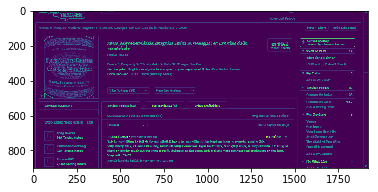

In [82]:
#alternative two : edge detection approach
elevation_map = skimage.filters.sobel(gray) #Sobel transformation for edge detection
plt.imshow(elevation_map)

(-0.5, 1919.5, 899.5, -0.5)

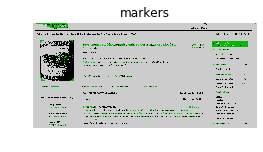

In [83]:
markers = np.zeros_like(gray)
markers[gray < 100] = 1
markers[gray > 200] = 2 # juste a little thresholding

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax.set_title('markers')
ax.axis('off')


(-0.5, 1919.5, 899.5, -0.5)

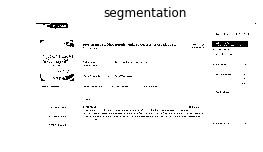

In [84]:
from skimage import morphology
#segmentation with watershed algorithm
segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('segmentation')
ax.axis('off')

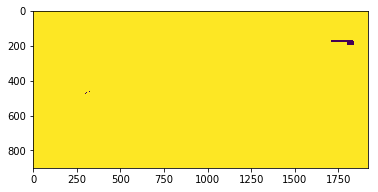

In [85]:
#text removal
kernel = np.ones((SIZE_KERNEL,SIZE_KERNEL),np.uint8)
segwonoise = cv2.erode(np.array(segmentation,dtype="uint8"),kernel, iterations = ITER_KERNEL) #erosion
segwonoise2 = cv2.dilate(np.array(segmentation,dtype="uint8"),kernel, iterations = ITER_KERNEL) #dilatation
#plt.imshow(segwonoise)
plt.imshow(segwonoise2)

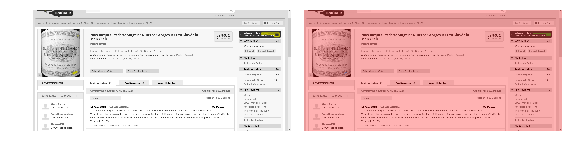

In [86]:
from skimage.color import label2rgb
from scipy import ndimage as ndi

segmentation2 = ndi.binary_fill_holes(2 - segwonoise2) 
labeled_seg, _ = ndi.label(segmentation2) #label the different region
image_label_overlay = label2rgb(labeled_seg, image=gray)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(gray, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation2, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()

## STEP 2.4 Get the region corresponding to the bottle

In [139]:
'''
def getImageIndex(markers,gray):
    nseg=markers.max()
    #if nseg==2:
    #    return(nseg)
    dmean={}
    for i in range(1,nseg+1):
        subgray=gray[markers==i]
        m=subgray.mean()
        milieu=(subgray.max()/2+subgray.min()/2)
        score=subgray[subgray<=m].std()+subgray[subgray>m].std()
        med=np.median(subgray)
        score3=np.abs(med-m)
        #score2=score
        score2=subgray[subgray<=milieu].std()+subgray[subgray>milieu].std()
        dmean[i]={"indice":i,"sd":gray[markers==i].std(),"mean" :m,"size":sum(sum(markers==i)),"score":score,"score2":score2,"score3":score3 }
    #(amaxd,maxd)=max(dmean.items())
    return(dmean)
    #return(amaxd)
'''
def getImageIndex(markers,gray):
    nseg=markers.max()
    #if nseg==2:
    #    return(nseg)
    dmean={}
    for i in range(1,nseg+1):
        #print(i)
        subgray=gray[markers==i]
        m=subgray.mean()
        milieu=(subgray.max()/2+subgray.min()/2)
        score=subgray[subgray<=m].std()+subgray[subgray>m].std()
        med=np.median(subgray)
        score3=np.abs(med-m)
        #score2=score
        score2=subgray[subgray<=milieu].std()+subgray[subgray>milieu].std()
        (x,y)=np.where(markers==i)
        xtarget=round(x.mean())
        ytarget=round(y.mean())
        beta=(scipy.stats.skew(subgray)**2+1)/scipy.stats.kurtosis(subgray)
        dmean[i]={"indice":i,"x":xtarget,"y":ytarget,"mean" :m,"sd":gray[markers==i].std(),"size":sum(sum(markers==i)),"beta":beta,"score":score,"score2":score2,"score3":score3 }
    #(amaxd,maxd)=max(dmean.items())
    return(dmean)
    #return(amaxd)

selMarkers=getImageIndex(labeled_seg,gray)
pdmarkers=pd.DataFrame(selMarkers).T
print(pdmarkers)

       beta  indice        mean      score     score2    score3         sd  \
1 -0.333333     1.0   51.000000        NaN        NaN  0.000000   0.000000   
2 -0.333333     2.0   52.000000        NaN        NaN  0.000000   0.000000   
3 -0.693520     3.0  177.333333   2.500000   2.500000  0.666667   4.921608   
4 -0.333333     4.0  169.000000        NaN        NaN  0.000000   0.000000   
5 -1.599203     5.0  144.371681  30.547483  34.071697  5.628319  30.591281   

     size      x       y  
1     1.0    0.0    91.0  
2  1975.0  178.0  1787.0  
3     3.0  190.0   335.0  
4     1.0  458.0   328.0  
5   113.0  466.0   310.0  


C:\Users\lucas.michon\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\lucas.michon\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\lucas.michon\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


466.0 310.0


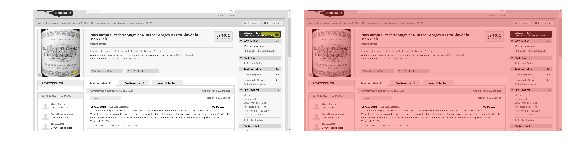

In [140]:
pdmarkers.score3[pdmarkers.score3==0]=np.inf
pdmarkers.beta[pdmarkers.sd==0]=np.inf
#who=pdmarkers.indice[pdmarkers.score3==min(pdmarkers[pdmarkers["size"]>SIZE_MIN].score3)]
who=pdmarkers.indice[pdmarkers.beta==min(pdmarkers[pdmarkers["size"]>SIZE_MIN].beta)]
(x,y)=np.where(labeled_seg==int(who))
xtarget=round(x.mean())
ytarget=round(y.mean())
print(xtarget,ytarget)


#image_label_overlay = label2rgb(labeled_seg==int(who), image=gray)
image_label_overlay = label2rgb(labeled_seg==14, image=gray)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(gray, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation2, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()

In [96]:
#print(pdmarkers.iloc[who-1,:])
#print(who)
#print(pdmarkers.indice==int(who))
#print(pdmarkers[pdmarkers.indice==int(who),:])
print(pdmarkers[:2])
for idx, row in pdmarkers[:10].iterrows():
    print(idx)
    print(row["beta"])

       beta  indice  mean  score  score2  score3   sd    size      x       y
1 -0.333333     1.0  51.0    NaN     NaN     0.0  0.0     1.0    0.0    91.0
2 -0.333333     2.0  52.0    NaN     NaN     0.0  0.0  1975.0  178.0  1787.0
1
-0.3333333333333333
2
-0.3333333333333333
3
-0.693520376763766
4
-0.3333333333333333
5
-1.599202585436406


## STEP 2.5 Save the picture

In [ ]:
pya.moveTo(ytarget,HIGH_CROP+xtarget,TIME_TO_MOVE) #go to the pic
pya.click()
pya.moveTo(screenWidth / 2, screenHeight / 2,TIME_TO_MOVE)
pya.click(button="right")
pya.press(['s', 's','s','s','enter'])
pya.click()
time.sleep(0.1)
pya.typewrite(PICTURE)
pya.press(['enter','esc']) #save the picture

## STEP 2.6 Save the HTML file

In [ ]:
pya.hotkey('ctrl','u')
time.sleep(0.1)
pya.click(button="right")
pya.press(['e'])
time.sleep(0.1)
pya.typewrite(HTML)
pya.press(['enter']) #save the source code
pya.hotkey('ctrl','w') #close the page

# Bonus : Algorithme par renforcement + éventuellement classifieur bayésien naïf pour mieux identifier quelles régions correspondent à des images de bouteille et, dans le cas d'un échec de la segmentation, cliquer sur la zone de l'écran où la probabilité d'y voir l'image est maximale 

# STEP 3 Read HTML files to get informations

# STEP 4 Automatize

In [76]:
screenWidth, screenHeight = pya.size()
currentMouseX, currentMouseY = pya.position()
def selectImage(url,numero=0,clickBeforeSave=True):
    pya.moveTo(0, screenHeight / 2)
    webbrowser.open(url)
    time.sleep(TIME_PAUSE)
    pya.scroll(-TO_SCROLL)
    time.sleep(.5)
    im2=pya.screenshot()
    im=im2.crop((0,HIGH_CROP,screenWidth,screenHeight-DOWN_CROP)) #crop image
    img = np.asanyarray(im)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to gray
    elevation_map = skimage.filters.sobel(gray)
    markers = np.zeros_like(gray)
    markers[gray < 100] = 1
    markers[gray > 200] = 2
    segmentation = morphology.watershed(elevation_map, markers)
    kernel = np.ones((SIZE_KERNEL,SIZE_KERNEL),np.uint8)
    segwonoise = cv2.erode(np.array(segmentation,dtype="uint8"),kernel, iterations = ITER_KERNEL) #erosion
    segwonoise2 = cv2.dilate(np.array(segmentation,dtype="uint8"),kernel, iterations = ITER_KERNEL) #dilatation
    segmentation2 = ndi.binary_fill_holes(2 - segwonoise2) 
    labeled_seg, _ = ndi.label(segmentation2)
    selMarkers=getImageIndex(labeled_seg,gray)
    pdmarkers=pd.DataFrame(selMarkers).T
    pdmarkers.score3[pdmarkers.score3==0]=np.inf
    pdmarkers.beta[pdmarkers.sd==0]=np.inf
    who=pdmarkers.indice[pdmarkers.beta==min(pdmarkers[pdmarkers["size"]>SIZE_MIN].beta)]
    (x,y)=np.where(labeled_seg==int(who))
    xtarget=round(x.mean())
    ytarget=round(y.mean())
    pya.moveTo(ytarget,HIGH_CROP+xtarget,TIME_TO_MOVE) #go to the pic
    pya.click()
    '''
    pya.moveTo(screenWidth / 2, screenHeight / 2,TIME_TO_MOVE)
    pya.click(button="right")
    #pya.press(['s', 's','s','s','enter'])
    pya.press(['down', 'down','down','down','enter'])
    #pya.click()
    time.sleep(0.1)
    namePic=str(numero)+".png"
    pya.typewrite(namePic)
    time.sleep(0.1)
    pya.press(['enter'])
    '''
    time.sleep(0.1)
    #pya.press(['o'])
    #time.sleep(0.1)
    #pya.press(['esc']) #escape from zoom
    #pya.hotkey('ctrl','w') #close window
    print("finiiiiiii")
    return(pdmarkers.iloc[who-1,:])

#i=4
#test=selectImage(D_URL[i]["URL"],i)


In [45]:
i=0
test=selectImage(D_URL[i]["URL"],i)
print(test)

finiiiiiii
       beta  indice       mean      score     score2    score3         sd  \
7 -1.238685     7.0  93.310141  53.696692  57.139098  0.689859  50.225931   

      size      x      y  
7  89440.0  322.0  206.0  


In [90]:
i=14
test=selectImage(D_URL[i]["URL"],i)
print(test)

finiiiiiii
       beta  indice        mean      score     score2    score3         sd  \
5 -1.599203     5.0  144.371681  30.547483  34.071697  5.628319  30.591281   

    size      x      y  
5  113.0  466.0  310.0  


In [91]:

for idx, row in df.iterrows():
    #D_URL[idx]["STATS"]=test
    D_URL[idx]["STATS"]=selectImage(row['URL'],idx)
    #print(row['URL'])
    #webbrowser.open(row['URL'])

#D_URL[0]["stat"]=test
#print(pd.DataFrame(D_URL))

finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii


In [16]:
print(D_URL)

{0: {'URL': 'https://www.cellartracker.com/wine.asp?iWine=940', 'STATS':        beta  indice       mean      score     score2    score3         sd  \
7 -1.238685     7.0  93.310141  53.696692  57.139098  0.689859  50.225931   

      size      x      y  
7  89440.0  322.0  206.0  }, 1: {'URL': 'https://www.cellartracker.com/wine.asp?iWine=2383250', 'STATS':        beta  indice       mean      score     score2     score3         sd  \
8  1.402068     8.0  69.413371  57.372665  39.802497  17.413371  50.576391   

     size      x       y  
8  1062.0  182.0  1551.0  }, 2: {'URL': 'https://www.cellartracker.com/wine.asp?iWine=2885171', 'STATS':        beta  indice       mean      score     score2     score3         sd  \
7 -2.491705     7.0  72.155571  73.140329  67.645772  10.155571  67.676131   

      size      x      y  
7  86218.0  317.0  207.0  }, 3: {'URL': 'https://www.cellartracker.com/wine.asp?iWine=2072263', 'STATS':        beta  indice       mean      score     score2    score3

In [92]:
dtest=pd.DataFrame(D_URL)
print(D_URL.keys())
D_BIS={}
for k in D_URL.keys():
    v=D_URL[k]['STATS']
    D_BIS[k]={'indice':int(v["indice"]),'x':float(v["x"]),'y':float(v["y"]),'size':float(v["size"]),'beta':float(v["beta"]),'mean':float(v["mean"]),'sd':float(v["sd"])}

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])


In [97]:
print(float(D_URL[0]["STATS"]["mean"]))
print(pd.DataFrame(D_BIS).T)
results = pd.DataFrame(D_BIS).T

95.38982035928144
         beta  indice        mean         sd     size      x      y
0   -1.216579     2.0   95.389820  50.516496  83500.0  324.0  208.0
1    1.120954     3.0    8.044705  28.776651   2304.0  268.0  208.0
2   -2.292170     2.0   72.437582  69.136498  79512.0  317.0  208.0
3   -0.683989     2.0   79.285824  51.271365  47043.0  289.0  240.0
4    0.683800     2.0  106.211205  26.099483  57958.0  306.0  206.0
5    0.464459     2.0   40.747334  15.099133  27851.0  332.0  207.0
6   -2.154553     2.0   67.133570  47.928852  56884.0  311.0  192.0
7   -8.138663     4.0   80.746924  41.631791  20725.0  431.0  179.0
8    0.687325     3.0    9.908892  12.032490   8232.0  279.0  217.0
9    0.584734     4.0   56.451165  17.664554   7208.0  353.0  207.0
10  -2.532269     4.0   44.264056  39.192974   2988.0  458.0  180.0
11  -2.297376     2.0   92.958931  38.797960  83493.0  324.0  207.0
12   4.301204     2.0   58.118719  67.370695  83500.0  324.0  208.0
13  -1.263997     2.0   89.307

In [177]:
logV=np.zeros_like(gray)
dMel=np.zeros_like(gray)
(nr,nc)=logV.shape
v1=np.array(range(nr))
v1.shape=(nr,1)
matR=np.dot(v1,np.ones((1,nc)))
v2=np.array(range(nc))
v2.shape=(1,nc)
matC=np.dot(np.ones((nr,1)),v2)
sigma=10
(N,dummy)=results.shape
for idx, row in results.iterrows():
    logV=logV-((matR-row["x"])**2+(matC-row["y"])**2)/((2*sigma)**2)
    dMel=dMel+np.exp(-((matR-row["x"])**2+(matC-row["y"])**2)/((2*sigma)**2))
dMel=dMel/N

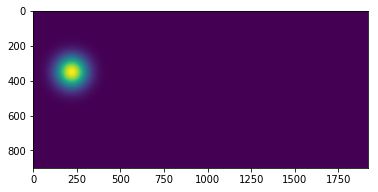

In [172]:
fig, ax = plt.subplots()
im = ax.imshow(np.exp(logV))

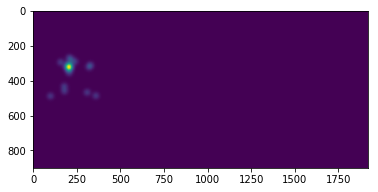

In [178]:
#with a mixture law
fig, ax = plt.subplots()
im = ax.imshow(dMel)

(array([ 1.,  0.,  0.,  3.,  0., 11.,  4.,  1.,  0.,  1.]),
 array([-21.92133404, -18.18899943, -14.45666483, -10.72433022,
         -6.99199561,  -3.25966101,   0.4726736 ,   4.2050082 ,
          7.93734281,  11.66967741,  15.40201202]),
 <a list of 10 Patch objects>)

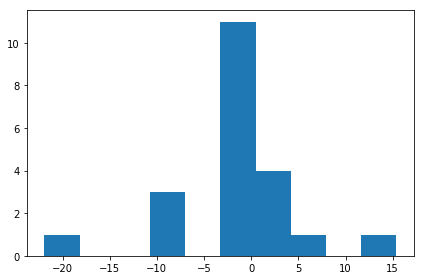

In [180]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs.hist(results.beta)